In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.stats


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [3]:
#Datensätze
df_lu = pd.read_csv('Luxembourg_new.csv')
df_de = pd.read_csv('Deutschland_new.csv')
df_fr = pd.read_csv('Frankreich_new.csv')
df_be = pd.read_csv('Belgien_new.csv')

#Features
fe_lu = ["Kaufpreis","Baujahr", "Grundstücksfläche","Badezimmer", "Schlafzimmer", "Parkplätze","Garten","Haus","Wohnung","Bevölkerung", "Distanz"]
fe_de = ["Kaufpreis","Baujahr", "Grundstücksfläche","Badezimmer", "Schlafzimmer", "Parkplätze","Garten","Haus","Wohnung","Bevölkerung","DistanzKöln","DistanzSaarbrücken","DistanzFrankfurt","DistanzLuxemburg"]
fe_fr = ["Kaufpreis","Baujahr", "Grundstücksfläche","Badezimmer", "Schlafzimmer", "Parkplätze","Garten","Haus","Wohnung","Bevölkerung","DistanzSaarbrücken","DistanzThionville","DistanzMetz","DistanzLuxemburg"]
fe_be = ["Kaufpreis","Baujahr", "Grundstücksfläche","Badezimmer", "Schlafzimmer", "Parkplätze","Garten","Haus","Wohnung","Bevölkerung","DistanzNamur","DistanzMaastricht","DistanzBrüssel","DistanzLuxemburg"]

#Paare
df_fe_pairs = [(df_lu, fe_lu), (df_de, fe_de), (df_fr, fe_fr),(df_be, fe_be)]
dataframes =[df_lu,df_de,df_fr,df_be]


# Normale Verteilung der Daten durch Log-Transformation

In [4]:
def log_transform(feature, dataframe):
    newfe = feature + "_log"
    dataframe[newfe] = np.log1p(dataframe[feature])
    #Skewness/Schiefheit und Kurtosis zur Normalitätseinschätzung
    s_davor = dataframe[feature].skew()
    s_danach = dataframe[newfe].skew()
    k_davor = dataframe[feature].kurt()
    k_danach = dataframe[newfe].kurt()
    if((abs(s_danach) < abs(s_davor) or abs(k_davor) < abs(k_danach)) and (dataframe[newfe] < 2).all() == False):
        if(abs(s_danach) < 2 and abs(k_danach) < 7):
            normally_distributed.append(feature)
        else:
            if newfe in dataframe.columns:
                dataframe = dataframe.drop([newfe],axis=1)
    else:
        if newfe in dataframe.columns:
            dataframe = dataframe.drop([newfe], axis=1)
    return dataframe

    

In [5]:
temp_dfs = []
for df,fes in df_fe_pairs:
    normally_distributed = []
    for fe in fes:
        df = log_transform(fe,df)
    pprint(normally_distributed)
    #df = df.drop(['Wohnung','Haus','Garten'],axis = 1)
    #df.hist(figsize=(10,10),xlabelsize=8)
    temp_dfs.append(df)
    
df_lu,df_de,df_fr,df_be = [df for df in temp_dfs]
    
#Liste der Log-Transformierten Attribute:

['Kaufpreis',
 'Grundstücksfläche',
 'Badezimmer',
 'Schlafzimmer',
 'Parkplätze',
 'Bevölkerung',
 'Distanz']
['Kaufpreis',
 'Baujahr',
 'Grundstücksfläche',
 'Schlafzimmer',
 'Parkplätze',
 'Bevölkerung',
 'DistanzKöln',
 'DistanzFrankfurt',
 'DistanzLuxemburg']
['Kaufpreis',
 'Grundstücksfläche',
 'Schlafzimmer',
 'Bevölkerung',
 'DistanzLuxemburg']
['Kaufpreis',
 'Grundstücksfläche',
 'Schlafzimmer',
 'Parkplätze',
 'Bevölkerung',
 'DistanzMaastricht',
 'DistanzBrüssel']


# Welche Attribute behalten wir?

In [6]:
for df in [df_lu,df_de,df_fr,df_be]:
    print("\n\n\n")
    for fe in df.columns:
        if(fe == "Stadt"):
            continue
        if abs(round(scipy.stats.pearsonr(df[fe],df.Kaufpreis_log)[0],2)) > 0.199:
            print(fe + " : "+ str(round(scipy.stats.pearsonr(df[fe],df.Kaufpreis_log)[0],2)))





Distanz : -0.44
Kaufpreis : 0.95
Wohnung : -0.38
Haus : 0.38
Grundstücksfläche : 0.58
Schlafzimmer : 0.56
Badezimmer : 0.44
Parkplätze : 0.27
Garten : 0.24
Kaufpreis_log : 1.0
Grundstücksfläche_log : 0.61
Badezimmer_log : 0.44
Schlafzimmer_log : 0.56
Parkplätze_log : 0.28
Distanz_log : -0.38




Baujahr : 0.44
Kaufpreis : 0.85
Grundstücksfläche : 0.46
Schlafzimmer : 0.29
Badezimmer : 0.27
Kaufpreis_log : 1.0
Baujahr_log : 0.44
Grundstücksfläche_log : 0.46
Schlafzimmer_log : 0.28




DistanzThionville : -0.21
Kaufpreis : 0.94
Grundstücksfläche : 0.62
Schlafzimmer : 0.59
Badezimmer : 0.46
Parkplätze : 0.23
Garten : 0.32
Haus : 0.49
Wohnung : -0.43
Kaufpreis_log : 1.0
Grundstücksfläche_log : 0.72
Schlafzimmer_log : 0.64




Kaufpreis : 0.91
Grundstücksfläche : 0.63
Schlafzimmer : 0.58
Badezimmer : 0.39
Haus : 0.35
Wohnung : -0.35
Kaufpreis_log : 1.0
Grundstücksfläche_log : 0.68
Schlafzimmer_log : 0.59


# Multikollinearität durch PCA und Einheitlich Skalieren: 

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
def pcr(X,y, pc):
    pca = PCA()
    # Vorverarbeitungsschritt, Standardisierung 
    Xstd = StandardScaler().fit_transform(X)
    # PCA starten, Reduzierte Variable Xreg produzieren mit weniger Hauptkomponenten
    Xreg = pca.fit_transform(Xstd)[:,:pc]
    ''' Regression durchführen'''
    y_cv, score_c, score_cv, mse_c, mse_cv = simple_regression(Xreg, y)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

In [9]:
def simple_regression(X,y):
    regr = linear_model.LinearRegression()
    regr.fit(X, y)
    # Kalibration
    y_c = regr.predict(X)
    # Kreuzvalidierung (K-fach, k=5)
    y_cv = cross_val_predict(regr, X, y,cv=5)
    # Kalibrations- und Kreuzvalidierungsmaß berechnen
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # MSE für Kalibration und Kreuzvalidierung berechnen
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    return(y_cv, score_c, score_cv, mse_c, mse_cv)

In [10]:
def optimale_Komponenten_anzahl(data,features):
    X = data.loc[:, features].values
    y = data['Kaufpreis_log']
    npc = len(features) # maximum number of principal components
    pc = range(1,npc+1,1)
    # Define arrays for R^2 and MSE
    r2c = np.zeros(npc)
    r2cv = np.zeros(npc)
    msec = np.zeros(npc)
    msecv = np.zeros(npc)
    for i in pc:
        predicted, r2c[i-1], r2cv[i-1], msec[i-1], msecv[i-1] = pcr(X,y, pc=i)
        if(i == len(features)):
            with plt.style.context(('ggplot')):
                plt.plot(pc, np.sqrt(msecv[:]), 'r', label = "RMSECV(Mögl. Performance der Kalibration)")
                plt.plot(pc, np.sqrt(msec[:]), 'b', label = "RMSEC(Qualität der Kalibration)")
                plt.xlabel("# Anzahl Hauptkomponenten")
                plt.ylabel("RMSE")
                plt.title("Hauptkomponentenregression")
                plt.legend()
        #plt.show()
    return X,y

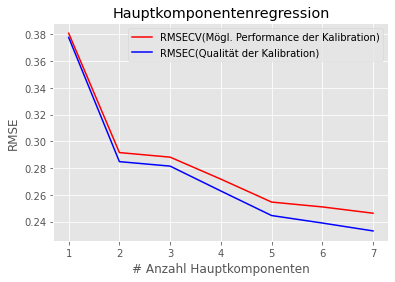

In [11]:
features_lu = ["Grundstücksfläche_log", "Badezimmer_log","Schlafzimmer_log","Parkplätze_log","Distanz_log","Garten","Haus"]
X,y = optimale_Komponenten_anzahl(df_lu,features_lu)

Bei 5 Hauptkomponenten ist der zu betrachtende RMSECV beinahe an seinem Tiefpunkt, Ziel ist es die Dimensionalität zu reduzieren, 5 wäre also eine gute Anzahl an Hauptkomponenten um die Varianz zusammenzufassen ohne zu viel Informationsverlust zu erleiden.

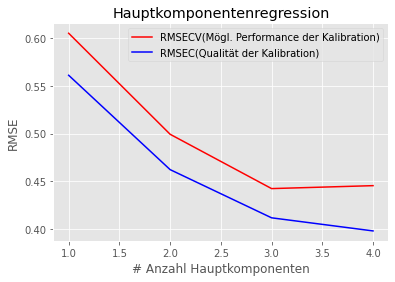

In [12]:
features_de = ["Badezimmer","Baujahr_log","Grundstücksfläche_log","Schlafzimmer_log"]
X,y = optimale_Komponenten_anzahl(df_de,features_de)

Tiefpunkt des RMSECV in Deutschland liegt bei 3 Hauptkomponenten

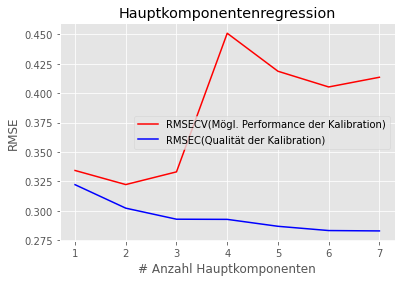

In [13]:
features_fr = ["DistanzThionville","Badezimmer","Parkplätze","Garten","Haus","Grundstücksfläche_log","Schlafzimmer_log"]
X,y = optimale_Komponenten_anzahl(df_fr,features_fr)

Tiefpunkt des RMSECV liegt in Frankreich bei 2 Hauptkomponenten

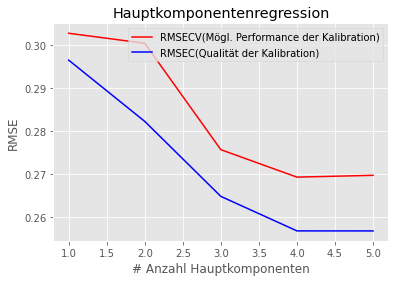

In [14]:
features_be = ["Badezimmer","Haus","Wohnung","Grundstücksfläche_log","Schlafzimmer_log"]
X,y = optimale_Komponenten_anzahl(df_be,features_be)

In Belgien liegt bei 4 Hauptkomponenten der Tiefpunkt des RMSECV

# Mehrfache Lineare OLS Regression

In [15]:
def pca_vs_no_pca(dataframe, features, anzahlKomponenten):
    X = dataframe[features]
    Y = dataframe[['Kaufpreis_log']]
    y_cv, score_c, score_cv, mse_c, mse_cv = pcr(X,Y,anzahlKomponenten)
    y_cv2, score_c2, score_cv2, mse_c2, mse_cv2 = simple_regression(X,Y)

    print("Mit PCA" + "          " + "Ohne PCA")
    print(str(round(score_c,4) )+ "          " + str(round(score_c2,4)))
    print(str(round(score_cv,4) )+ "          " + str(round(score_cv2,4)))
    print(str(round(mse_c,4) )+ "          " + str(round(mse_c2,4)))
    print(str(round(mse_cv,4) )+ "          " + str(round(mse_cv2,4))) 


In [16]:
pca_vs_no_pca(df_lu,features_lu,5)

Mit PCA          Ohne PCA
0.6842          0.7132
0.6576          0.6797
0.0598          0.0543
0.0648          0.0607


In [17]:
pca_vs_no_pca(df_de,features_de,3)

Mit PCA          Ohne PCA
0.5112          0.5433
0.4354          0.4275
0.1692          0.1581
0.1955          0.1982


In [18]:
pca_vs_no_pca(df_fr,features_fr,2)

Mit PCA          Ohne PCA
0.539          0.5961
0.4758          0.1369
0.0913          0.08
0.1039          0.171


In [19]:
pca_vs_no_pca(df_be,features_be,4)

Mit PCA          Ohne PCA
0.5012          0.5012
0.4512          0.4495
0.0659          0.0659
0.0725          0.0727
